## Credit Card Lead Prediction
##### Steps followed are listed below
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

### 1. Defining the problem statement
Happy Customer Bank is a mid-sized private bank wants to cross sell its credit cards to its existing customers and is looking for help in identifying customers that could show higher intent towards a recommended credit card.

### 2. Collecting the data
Using pandas to load train and test csv files


In [22]:
import pandas as pd
import numpy as np
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

### 3. Exploratory Data Analysis
Printing the first five rows of the train and test data

In [23]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [24]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


#### Train Set Data Attributes
- Variable: Definition : Definition
- ID                   : Unique Identifier for a row 	
- Gender               : Gender of the Customer 	
- Age                  : Age of the Customer (in Years)
- Region_Code          : Code of the Region for the customers
- Occupation           : Occupation Type for the customer 
- Channel_Code         : Acquisition Channel Code for the Customer  (Encoded)
- Vintage              : Vintage for the Customer (In Months)
- Credit_Product       : If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)
- Avg_Account_Balance  : Average Account Balance for the Customer in last 12 Months              
- Is_Active            : If the Customer is Active in last 3 Months
- Is_Lead(Target)      : If the Customer is interested for the Credit Card, 0 : Customer is not interested, 1 : Customer is interested

In [25]:
print("train set rows\t\t: {}".format(train.shape[0]))
print("train set columns\t: {}\n".format(train.shape[1]))
print("test set rows\t\t: {}".format(test.shape[0]))
print("test set columns\t: {}".format(test.shape[1]))

train set rows		: 245725
train set columns	: 11

test set rows		: 105312
test set columns	: 10


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
ID                     245725 non-null object
Gender                 245725 non-null object
Age                    245725 non-null int64
Region_Code            245725 non-null object
Occupation             245725 non-null object
Channel_Code           245725 non-null object
Vintage                245725 non-null int64
Credit_Product         216400 non-null object
Avg_Account_Balance    245725 non-null int64
Is_Active              245725 non-null object
Is_Lead                245725 non-null int64
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
ID                     105312 non-null object
Gender                 105312 non-null object
Age                    105312 non-null int64
Region_Code            105312 non-null object
Occupation             105312 non-null object
Channel_Code           105312 non-null object
Vintage                105312 non-null int64
Credit_Product         92790 non-null object
Avg_Account_Balance    105312 non-null int64
Is_Active              105312 non-null object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [28]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [29]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

Both train and test set have NaN values under Credit Product attribute.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

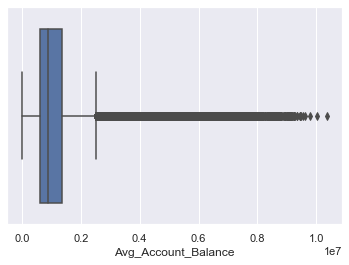

In [31]:
sns.boxplot(x='Avg_Account_Balance', data=train)

In [32]:
from scipy import stats
import numpy as np
print(train.shape)
train['AAB_Z_score'] = np.abs(stats.zscore(train['Avg_Account_Balance']))
train = train[~(train['AAB_Z_score'] > 1.17)] 


(245725, 11)


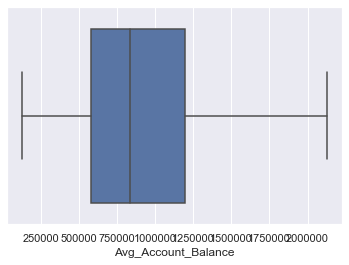

In [33]:
sns.boxplot(x='Avg_Account_Balance', data=train)

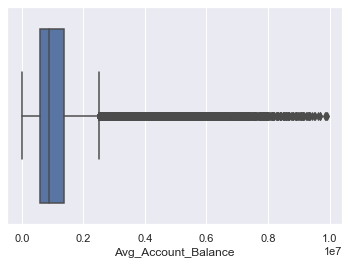

In [34]:
sns.boxplot(x='Avg_Account_Balance', data=test)

In [35]:
print(test.shape)
test['AAB_Z_score'] = np.abs(stats.zscore(test['Avg_Account_Balance']))
test = test[~(test['AAB_Z_score'] > 1.14)] 
print(test.shape)

(105312, 10)
(95438, 11)


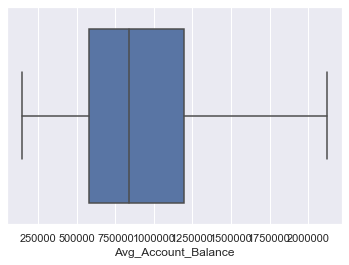

In [36]:
sns.boxplot(x='Avg_Account_Balance', data=test)

In [37]:
def bar_chart(feature, title_content="None"):
    lead = train[train['Is_Lead']==1][feature].value_counts()
    not_lead = train[train['Is_Lead']==0][feature].value_counts()
    df = pd.DataFrame([lead,not_lead])
    df.index = ['Is a lead','Not a lead']
    df.plot(kind='bar',stacked=True, figsize=(10,5), title=title_content)

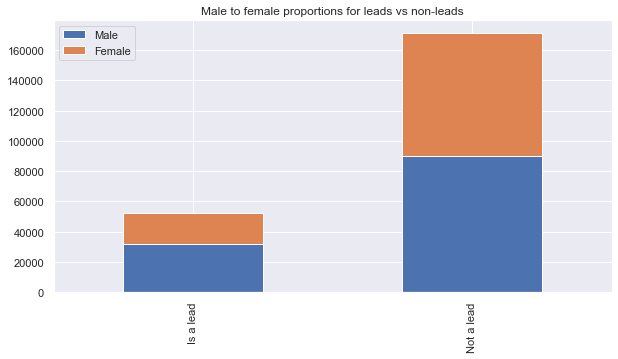

In [38]:
bar_chart('Gender','Male to female proportions for leads vs non-leads')

The above chart suggests that genders really doesn't define if someone is not interested in credit cards. Among those who are interested to have credit card there are more men than woman.

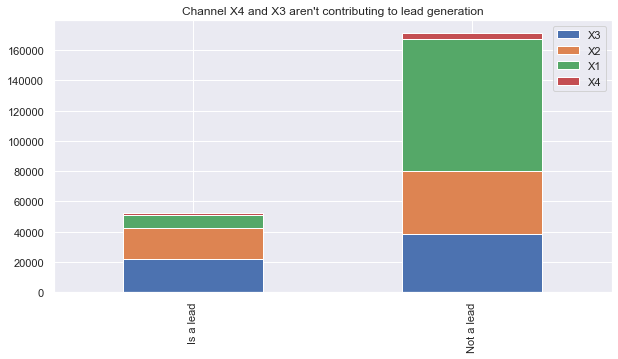

In [39]:
bar_chart('Channel_Code',"Channel X4 and X3 aren't contributing to lead generation")

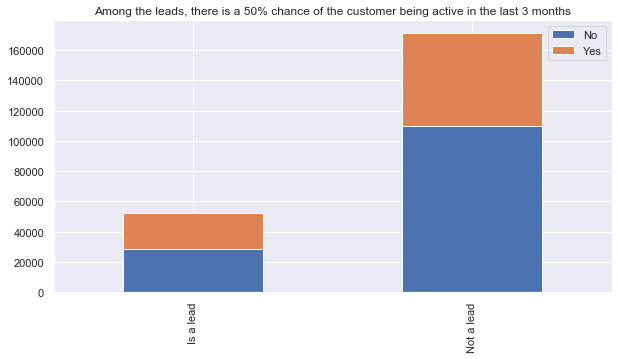

In [40]:
bar_chart('Is_Active','Among the leads, there is a 50% chance of the customer being active in the last 3 months')

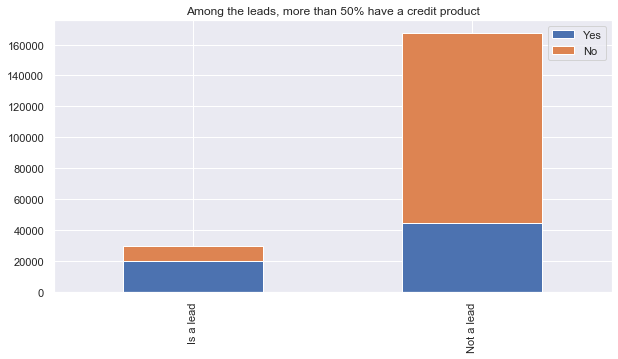

In [41]:
bar_chart('Credit_Product','Among the leads, more than 50% have a credit product')

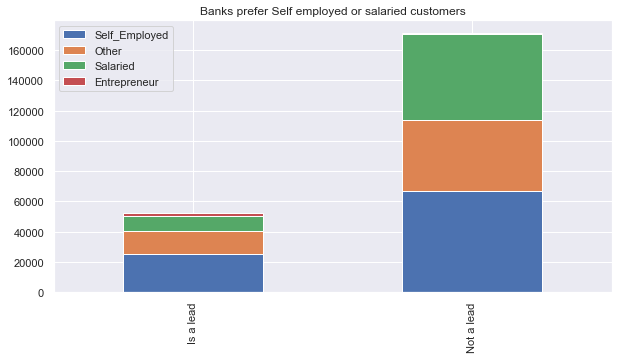

In [42]:
bar_chart('Occupation','Banks prefer Self employed or salaried customers')

### 4. Feature Engineering
The algorithms in machine learning require a numerical representation of data so that
such representations facilitate processing and statistical analysis. 

The following attributes can be looked upon for feature engineering
- Gender *
- Age *
- Region Code
- Occupation *
- Channel Code *
- Vintage *
- Credit Product 
- Average Account Balance *
- Is Active *

Several website suggest that Credit card eligibility depends on

Age : above 18 year and below 60 years
Region : Eligibility depends on the location from of a customer
Occupation : People who are either Salaried / Self employed
These statements suggest what might be beneficial for the customers and the banks.

Since Gender, Occupation, Channel Code, and Is Active attributes have only few dimentions and do not have Nan values, it would be easy to map out their values to numrica values easily.

### 4.1 Gender
Gender mapping [male:0, female: 1]

In [43]:
train_test_data = [train, test]

In [44]:
gender_mapping = {"Male": 0, "Female": 1}
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map(gender_mapping)

### 4.2 Occupation
Occupation Mapping [Self Employed: 1, other: 0, Salaried: 1, Entreprenuer: 0]

In [45]:
occupation_mapping = {"Self_Employed": 0, "Other": 1, "Salaried": 2, "Entrepreneur": 3}
for dataset in train_test_data:
    dataset['Occupation'] = dataset['Occupation'].map(occupation_mapping)

### 4.3 Channel Code
Channel code Mapping [X1: 0, X2: 1, X3: 2, X4: 3]

In [46]:
channel_code_mapping = {"X1": 0, "X2": 1, "X3": 2, "X4": 3}
for dataset in train_test_data:
    dataset['Channel_Code'] = dataset['Channel_Code'].map(channel_code_mapping)

### 4.4 Is Active
Credit Product Mapping [No: 0, Yes: 1]

In [47]:
is_active_mapping = {"No": 0, "Yes": 1}
for dataset in train_test_data:
    dataset['Is_Active'] = dataset['Is_Active'].map(is_active_mapping)

### 4.5 Age

In [48]:
print("Maximum Age: {}".format(train["Age"].max()))
print("Minimum Age: {}".format(train["Age"].min()))

Maximum Age: 85
Minimum Age: 23


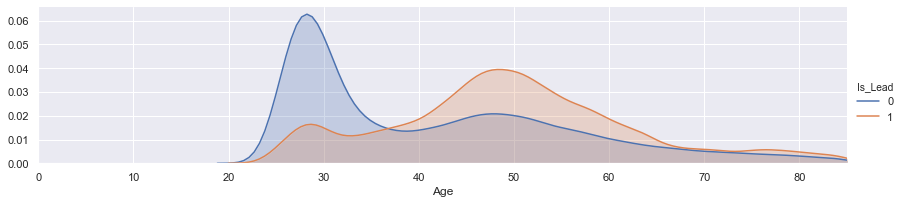

In [49]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show() 

According the the age distribution with respect to the "Is Lead" attribute, there are several cross over points.


(20, 40)

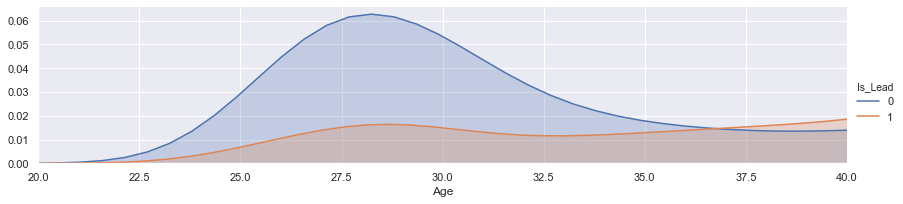

In [50]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 40)

(35, 70)

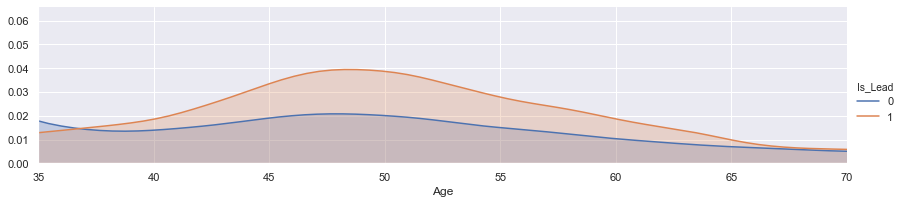

In [51]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(35, 70)

(70, 85)

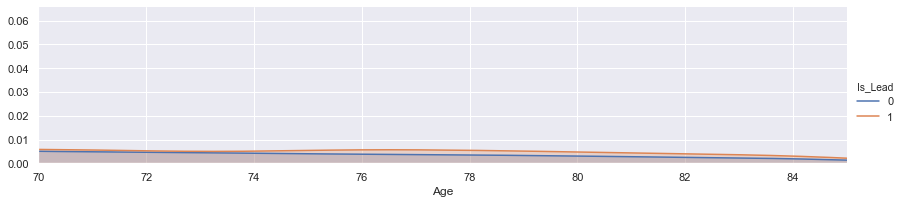

In [52]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(70, 85)

### 4.5.1 Binning - Age
Binning/Converting Numerical Age to Categorical Variable

Feature vector map

Under 37 years old:           0

More the 37 and less than 70: 1

Greater than 70:              2


In [53]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 37, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 70), 'Age'] = 1
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 2

### 4.6 Vintage

In [54]:
print("Maximum vintage in months: {}".format(train["Vintage"].max()))
print("Minimum vintage in months: {}".format(train["Vintage"].min()))

Maximum vintage in months: 135
Minimum vintage in months: 7


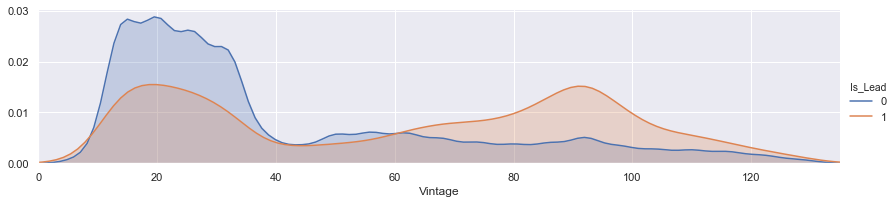

In [55]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.show() 

Observing cross over points in the vintage vs is_lead attribute

(0, 10)

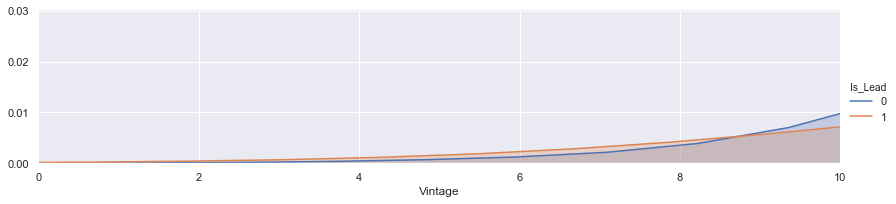

In [56]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.xlim(0, 10)

(7, 65)

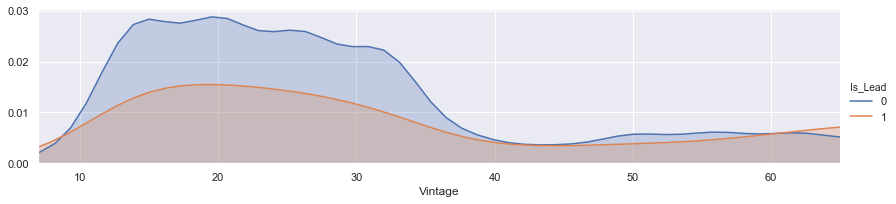

In [57]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.xlim(7, 65)

(60, 135)

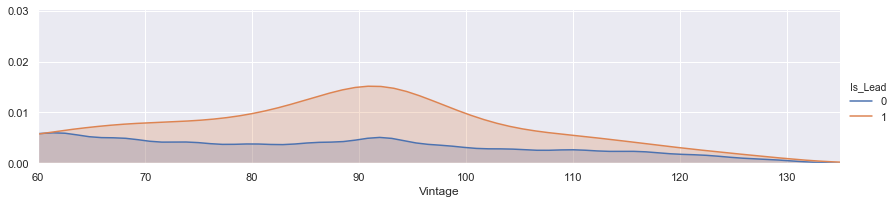

In [58]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Vintage',shade= True)
facet.set(xlim=(0, train['Vintage'].max()))
facet.add_legend()
plt.xlim(60, 135)

### 4.6.1 Binning - Vintage
Binning/Converting Numerical Vintage to Categorical Variable

Feature vector map

Under 8 months old: 0

More the 8 and less than 62 months: 1

Greater than 62: 2

In [59]:
for dataset in train_test_data:
    dataset.loc[ dataset['Vintage'] <= 8, 'Vintage'] = 0
    dataset.loc[(dataset['Vintage'] > 8) & (dataset['Vintage'] <= 62), 'Vintage'] = 1
    dataset.loc[ dataset['Vintage'] > 62, 'Vintage'] = 2

### 4.7 Average Account Banlance

In [60]:
print("Maximum average account balance: {}".format(train["Avg_Account_Balance"].max()))
print("Minimum average account balance: {}".format(train["Avg_Account_Balance"].min()))

Maximum average account balance: 2126325
Minimum average account balance: 130741


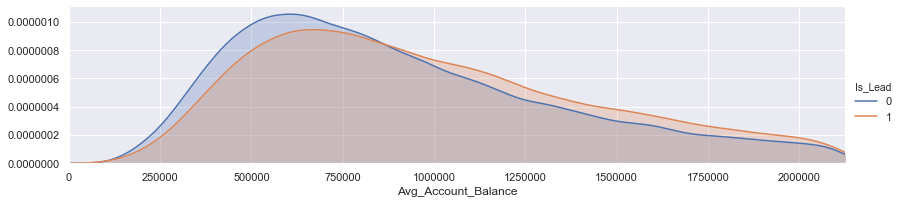

In [61]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Avg_Account_Balance',shade= True)
facet.set(xlim=(0, train['Avg_Account_Balance'].max()))
facet.add_legend()
plt.show()

(0, 1000000)

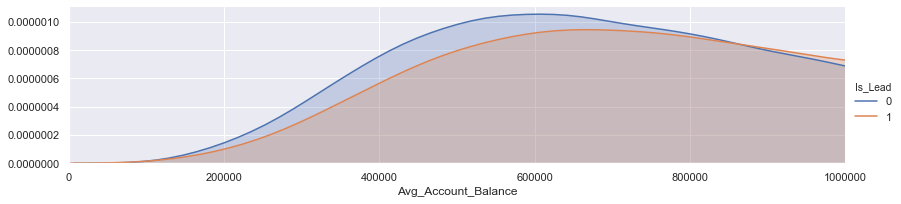

In [62]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Avg_Account_Balance',shade= True)
facet.set(xlim=(0, train['Avg_Account_Balance'].max()))
facet.add_legend()
plt.xlim(0, 1000000)

(1000000, 3000000)

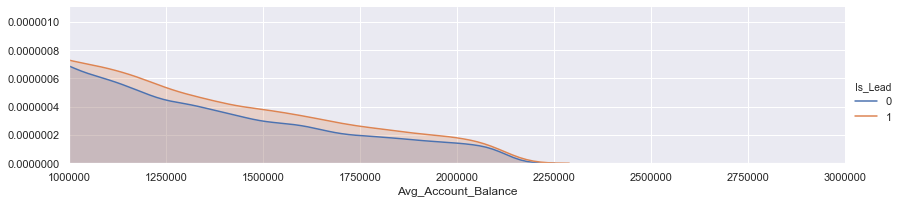

In [63]:
facet = sns.FacetGrid(train, hue="Is_Lead",aspect=4)
facet.map(sns.kdeplot,'Avg_Account_Balance',shade= True)
facet.set(xlim=(0, train['Avg_Account_Balance'].max()))
facet.add_legend()
plt.xlim(1000000, 3000000)

### 4.8.1 Binning - Average Account Balance
Binning/Converting Numerical Average Account Balance to Categorical Variable

Feature vector map

Under 1000000 : 0

More the 1000000 and less than 3000000 months: 1

Greater than 3000000: 2

In [64]:
for dataset in train_test_data:
    dataset.loc[ dataset['Avg_Account_Balance'] <= 1000000, 'Avg_Account_Balance'] = 0
    dataset.loc[(dataset['Avg_Account_Balance'] > 1000000) & (dataset['Vintage'] <= 3000000), 'Avg_Account_Balance'] = 1 
    dataset.loc[ dataset['Avg_Account_Balance'] > 3000000, 'Avg_Account_Balance'] = 2

In [65]:
train.head(40)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,AAB_Z_score
0,NNVBBKZB,1,2,RG268,1,2,1,No,1,0,0,0.096968
1,IDD62UNG,1,0,RG277,2,0,1,No,0,0,0,0.640630
2,HD3DSEMC,1,1,RG268,0,2,1,No,1,1,0,0.417279
3,BF3NC7KV,0,0,RG270,2,0,1,No,0,0,0,0.771395
4,TEASRWXV,1,0,RG282,2,0,1,No,0,0,0,0.283276
5,ACUTYTWS,0,1,RG261,0,0,1,No,0,1,0,0.684976
6,ETQCZFEJ,0,1,RG282,1,2,1,NaN,1,1,1,0.084008
7,JJNJUQMQ,1,1,RG265,0,2,1,No,0,1,0,0.801561
8,ZMQFYKCB,1,1,RG283,0,1,1,No,1,0,0,0.171034
9,NVKTFBA2,1,1,RG268,0,1,1,Yes,1,0,0,1.038574


### 4.9 Region Code

In [66]:
train["Region_Code"].value_counts()

RG268    29981
RG283    24346
RG254    23132
RG284    16047
RG280    12421
RG277    12093
RG270     7614
RG261     7371
RG269     7342
RG257     5877
RG251     5763
RG282     5693
RG272     5096
RG274     5064
RG281     4977
RG273     4370
RG252     4234
RG279     3918
RG263     3606
RG275     3191
RG260     3019
RG256     2811
RG264     2766
RG276     2571
RG259     2552
RG250     2487
RG255     2001
RG258     1917
RG278     1756
RG253     1619
RG262     1615
RG266     1544
RG265     1523
RG271     1515
RG267     1466
Name: Region_Code, dtype: int64

In [67]:
region_code_mapping = {"RG268": 0, "RG283": 1, "RG254": 1,
                       "RG284": 1, "RG277": 2, "RG280": 2,
                       "RG269": 3, "RG270": 3, "RG261": 3,
                       "RG257": 3, "RG251": 3, "RG282": 3,     
                       "RG274": 3, "RG272": 3, "RG281": 3,
                       "RG273": 3, "RG252": 3, "RG279": 3,
                       "RG263": 3, "RG275": 3, "RG260": 3,
                       "RG256": 3, "RG264": 3, "RG276": 3,    
                       "RG259": 3, "RG250": 3, "RG255": 3,    
                       "RG258": 3, "RG253": 3, "RG278": 3,    
                       "RG262": 3, "RG266": 3, "RG265": 3, 
                       "RG271": 3, "RG267": 3}

In [68]:
for dataset in train_test_data:
    dataset['Region'] = dataset['Region_Code'].map(region_code_mapping)
    
train.drop("Region_Code",axis=1,inplace=True)
test.drop("Region_Code",axis=1,inplace=True)

### 4.10 Credit Product

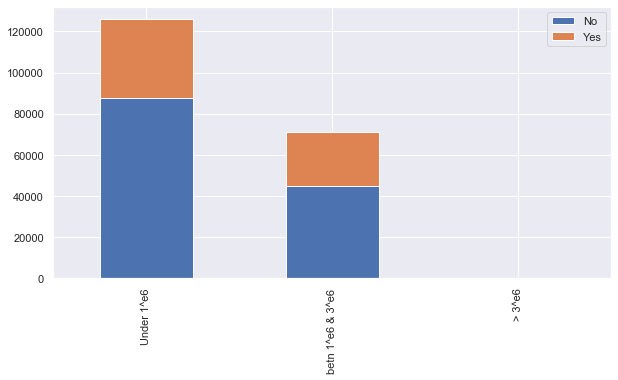

In [69]:
Pclass1 = train[train['Avg_Account_Balance']==0]['Credit_Product'].value_counts()
Pclass2 = train[train['Avg_Account_Balance']==1]['Credit_Product'].value_counts()
Pclass3 = train[train['Avg_Account_Balance']==2]['Credit_Product'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Under 1^e6','betn 1^e6 & 3^e6', '> 3^e6']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Since more the 50% under diffent average account brackets do not have credit product, fill out missing credit procut with "No" 

In [70]:
for dataset in train_test_data:
    dataset['Credit_Product'] = dataset['Credit_Product'].fillna('No')

In [71]:
credit_product_mapping = {"No": 0, "Yes": 1}
for dataset in train_test_data:
    dataset['Credit_Product'] = dataset['Credit_Product'].map(credit_product_mapping)

In [72]:
train_data = train.drop(['Is_Lead','ID'], axis=1)
target = train['Is_Lead']
train_data.shape, target.shape

((223298, 10), (223298,))

In [73]:
# train_data.info()
train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
AAB_Z_score            0
Region                 0
dtype: int64

#### 5. Modelling

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

#### 5.1 Cross Validation

In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

#### 5.2 KNN

In [83]:
clf = KNeighborsClassifier(n_neighbors = 5)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("KNN model accuracy: {}.".format(round(np.mean(score)*100,2)))

#### 5.X XGBOOST

In [77]:
import xgboost as xgb

In [78]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10,seed=123)

In [86]:
score = cross_val_score(xg_cl, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [85]:
print("Xgboost model accuracy: {}.".format(round(np.mean(score)*100,2)))

Xgboost model accuracy: 78.9.


In [81]:
test_data = test.drop("ID", axis=1).copy()
preds = xg_cl.predict(test_data)

#### 5.3 DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Decision Tree accuracy: {}.".format(round(np.mean(score)*100,2)))

#### 5.4 Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=7)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Random Forest accuracy: {}.".format(round(np.mean(score)*100,2)))

#### 5.5 Naive Bayes

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Naive Bayes accuracy: {}.".format(round(np.mean(score)*100,2)))

#### 6. Testing

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(train_data, target)
test_data = test.drop("ID", axis=1).copy()
prediction = clf.predict(test_data)
submission = pd.DataFrame({"ID": test["ID"],"Is_Lead": prediction})
submission.to_csv('submission_knn.csv', index=False)
submission = pd.read_csv('submission_knn.csv')
submission.head()
